In [1]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist.load_data?

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

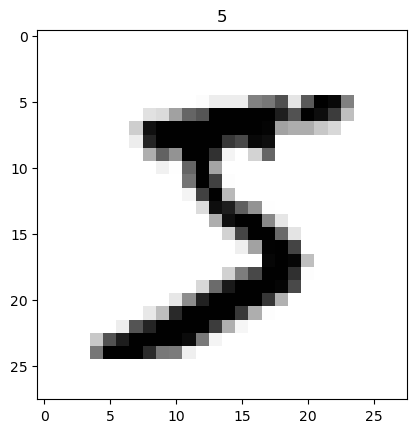

In [5]:
plt.imshow(x_train[0], cmap="binary") #binary to print B&W image
plt.title(y_train[0])
plt.show()

In [6]:
def plot_input_img(i):
    plt.imshow(x_train[i], cmap="binary") #binary to print B&W image
    plt.title(y_train[i])
    plt.show()

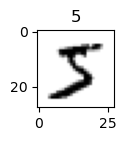

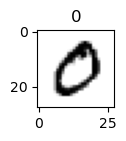

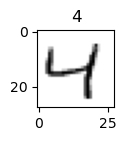

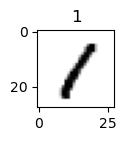

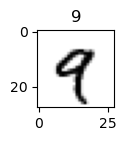

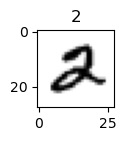

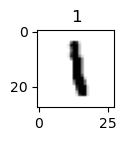

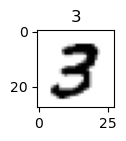

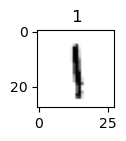

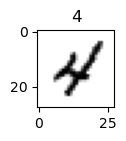

In [7]:
for i in range(10):
    plt.figure(figsize=(1, 1)) #set image size
    plot_input_img(i)

In [8]:
#pre processing the images
#Normalize the range between 0 to 1
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
#reshape or expand the dimentions
#add new dimentions with 1 => (Num_of_Sample, height, width, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
#convert class vectors (integers) to binary class matrices,(one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
#create model
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)               0

In [17]:
#CallBack
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Early stoping
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

#model check point
mc = ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose=1, save_best_only=True)

cb = [es, mc]

In [18]:
#EarlyStopping: This callback monitors a specified metric (val_acc in this case, which likely stands for validation accuracy) and stops the training process if the monitored metric stops improving. Here's a breakdown of the parameters:
#monitor: The metric to monitor. In this case, it's validation accuracy.
#min_delta: The minimum change in the monitored metric to be considered an improvement. A smaller min_delta value makes the callback more sensitive to improvements.
#patience: Number of epochs with no improvement after which training will be stopped.
#verbose: Verbosity mode. If set to 1, it will print messages about the early stopping condition.

#ModelCheckpoint: This callback saves the model after every epoch if the specified metric (val_acc in this case) improves. Here's what each parameter does:
#filepath: Path to save the model file.
#monitor: Metric to monitor. Here, it's validation accuracy.
#verbose: Verbosity mode. If set to 1, it will print messages about when the model is being saved.
#save_best_only: If True, the latest best model according to the monitored metric will not be overwritten.

In [19]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50


1688/1688 [==============================] - 19s 10ms/step - loss: 0.2131 - accuracy: 0.9355 - val_loss: 0.0637 - val_accuracy: 0.9817
Epoch 2/50
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0770 - accuracy: 0.9754 - val_loss: 0.0487 - val_accuracy: 0.9860
Epoch 3/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0573 - accuracy: 0.9816 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 4/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0395 - val_accuracy: 0.9883
Epoch 5/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.0324 - val_accuracy: 0.9913
Epoch 6/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0369 - val_accuracy: 0.9902
Epoch 7/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0322 

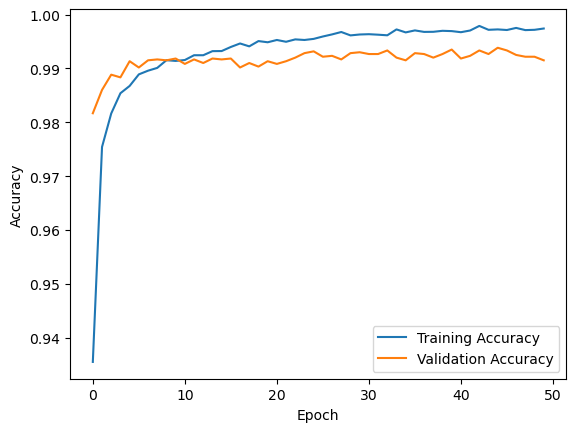

In [20]:
#plot loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0505 - accuracy: 0.9907
Test Accuracy: 0.9907000064849854


In [23]:
model.save("C://Users//user//jupyterExamples//Handwritten//bestmodelNEW.h5")

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
